In [31]:
"""from google.colab import drive
drive.mount('/content/drive')"""
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab Notebooks/



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks


In [32]:
!pwd

/gdrive/My Drive/Colab Notebooks


In [33]:
cd Experiments/exp_3/

/gdrive/My Drive/Colab Notebooks/Experiments/exp_3


In [34]:
!ls

saved_weights  test1.ipynb


In [0]:
%matplotlib inline
import keras 
import numpy as np 
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import itertools
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout
from tensorflow.python.client import device_lib
# keras library import  for Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model
from sklearn.metrics import confusion_matrix
# import cv2

In [0]:
  model = VGG16()

In [37]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [38]:
type(model)
print(len(model.layers))
number_of_layers = len(model.layers)

23


In [0]:
newModel = Sequential()
for layer in model.layers[:number_of_layers-3]: # go through until last layer
    newModel.add(layer)

In [40]:
newModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in newModel.layers:
  layer.trainable = False
  

In [42]:
newModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
newModel.add(Dropout(0.5))
newModel.add(Dense(1000, activation = 'relu'))
newModel.add(Dropout(0.4))
newModel.add(Dense(500, activation = 'relu'))
newModel.add(Dense(2, activation='softmax'))

In [44]:
newModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [45]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [47]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [48]:
!nvidia-smi

Thu Jun 11 06:49:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |   4353MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [49]:
newModel.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
#Compiling Model 
newModel.compile(Adam(lr=.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [0]:
data_path = "../casia_ela/"

In [0]:
#Defining Parameters
batch_size = 32
nb_epochs = 20
img_width = 224
img_height = 224


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [54]:
  train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 11469 images belonging to 2 classes.


In [55]:
validation_data = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2866 images belonging to 2 classes.


In [56]:
!pwd

/gdrive/My Drive/Colab Notebooks/Experiments/exp_3


In [57]:
!ls

saved_weights  test1.ipynb


In [58]:
history = newModel.fit_generator(
            train_data,
            steps_per_epoch = train_data.samples // batch_size,
            validation_data = validation_data, 
            validation_steps = validation_data.samples // batch_size,
            epochs = nb_epochs)


Epoch 1/20
358/358 [==============================] - 7212s 20s/step - loss: 0.4757 - accuracy: 0.7812 - val_loss: 0.9407 - val_accuracy: 0.6566
Epoch 2/20
358/358 [==============================] - 254s 709ms/step - loss: 0.3827 - accuracy: 0.8378 - val_loss: 0.9640 - val_accuracy: 0.6154
Epoch 3/20
358/358 [==============================] - 252s 703ms/step - loss: 0.3464 - accuracy: 0.8553 - val_loss: 0.9621 - val_accuracy: 0.6348
Epoch 4/20
358/358 [==============================] - 252s 704ms/step - loss: 0.3405 - accuracy: 0.8626 - val_loss: 0.8522 - val_accuracy: 0.6553
Epoch 5/20
358/358 [==============================] - 252s 704ms/step - loss: 0.3335 - accuracy: 0.8605 - val_loss: 0.8379 - val_accuracy: 0.6418
Epoch 6/20
358/358 [==============================] - 253s 706ms/step - loss: 0.3284 - accuracy: 0.8630 - val_loss: 0.9879 - val_accuracy: 0.6436
Epoch 7/20
358/358 [==============================] - 253s 706ms/step - loss: 0.3235 - accuracy: 0.8665 - val_loss: 1.3333 - 

In [59]:
print("done")


done


In [0]:
w_test1 = "saved_weights/test1.hdf5"
newModel.save_weights(w_test1, overwrite = True)


In [61]:
print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


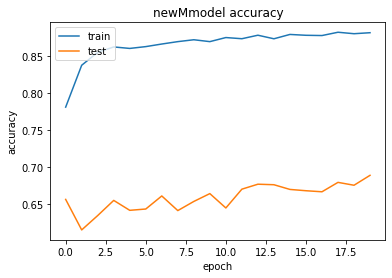

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('newMmodel accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



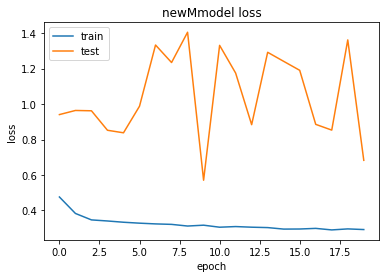

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('newMmodel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [65]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = newModel.predict_generator(validation_data, validation_data.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))


print('Classification Report')
target_names = ['Aut', 'Tamp']
print(classification_report(validation_data.classes, y_pred, target_names=target_names))


Confusion Matrix
[[1115  543]
 [ 841  367]]
Classification Report
              precision    recall  f1-score   support

         Aut       0.57      0.67      0.62      1658
        Tamp       0.40      0.30      0.35      1208

    accuracy                           0.52      2866
   macro avg       0.49      0.49      0.48      2866
weighted avg       0.50      0.52      0.50      2866



In [66]:
x, y = validation_data.class_indices
print(x, y)


aut tamp
